In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df= pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


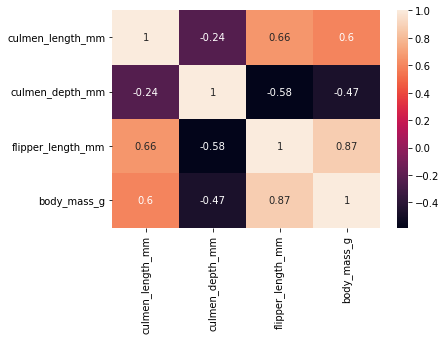

In [2]:
sns.heatmap(df.corr(),annot= True);

In [11]:
df.isnull().sum()
df = df.dropna()

In [13]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [22]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           FEMALE         MALE
culmen_length_mm  count    59.000000    61.000000
                  mean     45.545763    49.473770
                  std       2.038197     2.720594
                  min      40.900000    44.400000
                  25%      43.900000    48.100000
                  50%      45.500000    49.500000
                  75%      46.850000    50.500000
                  max      50.500000    59.600000
culmen_depth_mm   count    59.000000    61.000000
                  mean     14.262712    15.718033
                  std       0.568391     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.300000    15.700000
                  75%      14.600000    16.100000
                  max      15.700000    17.300000
flipper_length_mm count    59.000000    61.000000
                  mean    212.779661   221.540984
                  std       3.904320     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     212.000000   221.000000
                  75%     215.500000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    59.000000    61.000000
                  mean   4683.050847  5484.836066
                  std     280.295437   313.158596
                  min    3950.000000  4750.000000
                  25%    4475.000000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000

In [17]:
df.at[336,'sex'] = "FEMALE" # 336 is the index value of the row with sex "." 

In [18]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [24]:
X= pd.get_dummies(df.drop('species',axis =1),drop_first = True)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.94      0.95        33
   Chinstrap       0.90      0.95      0.93        20
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



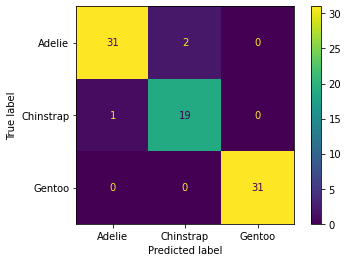

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test);

In [31]:
model.feature_importances_

array([0.34120224, 0.0393446 , 0.53486685, 0.00949223, 0.03747673,
       0.00949223, 0.02812512])

In [32]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [36]:
pd.DataFrame(index = X.columns, data =model.feature_importances_, columns = ['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.009492
island_Torgersen,0.009492
sex_MALE,0.028125
island_Dream,0.037477
culmen_depth_mm,0.039345
culmen_length_mm,0.341202
flipper_length_mm,0.534867


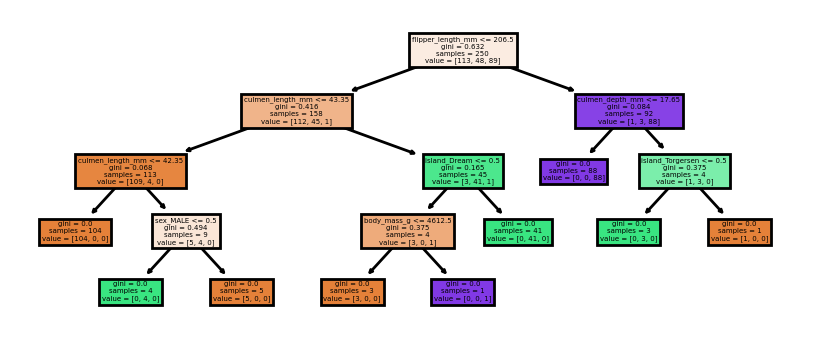

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize = (5,2), dpi =200)
plot_tree(model,feature_names = X.columns, filled = True );

In [43]:
def report_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test,model_pred))
    plt.figure(figsize = (5,2), dpi =200)
    plot_tree(model,feature_names = X.columns, filled = True );

              precision    recall  f1-score   support

      Adelie       0.97      0.94      0.95        33
   Chinstrap       0.90      0.95      0.93        20
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



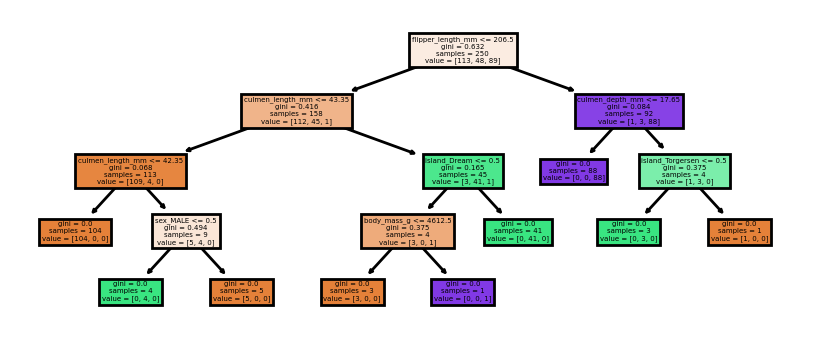

In [44]:
report_model(model)

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)